In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [60]:
# AL = comprimento axial do olho
# ACD = profundidade de câmara anterior
# WTW = distância brando a branco
# K1 = curvatura no meridiano menos curvo
# K2 = curvatura no meridiano mais curvo

df = pd.read_excel('barrettII_eyes_clustering.xlsx', engine='openpyxl')

df

,ID,AL,ACD,WTW,K1,K2,Correto
0,0,23.79,3.32,12.0,43.60,44.29,S
1,1,24.60,3.39,12.3,42.03,43.95,S
2,2,24.59,3.51,12.3,42.83,43.05,S
3,3,24.04,2.96,12.0,42.35,42.83,S
4,4,24.80,2.44,12.2,41.01,41.67,S
...,...,...,...,...,...,...,...
1523,1523,23.32,3.29,12.5,43.16,43.95,S
1524,1524,23.59,3.19,13.0,42.72,43.60,N
1525,1525,26.18,3.83,12.1,43.44,44.18,S
1526,1526,24.09,2.77,12.6,42.83,43.72,S


In [61]:
# Create new column
df['Correct'] = df['Correto']

# Create dictionary for classifications
labels_dict = {0 : 'N',
               1 : 'S'}

# Substitute the names for their labels in the new column
df['Correct'].replace(list(labels_dict.values()), list(labels_dict.keys()), inplace=True)

df.tail()

,ID,AL,ACD,WTW,K1,K2,Correto,Correct
1523,1523,23.32,3.29,12.5,43.16,43.95,S,1
1524,1524,23.59,3.19,13.0,42.72,43.60,N,0
1525,1525,26.18,3.83,12.1,43.44,44.18,S,1
1526,1526,24.09,2.77,12.6,42.83,43.72,S,1
1527,1527,23.99,3.09,11.8,44.70,45.30,N,0


In [62]:
feature_cols = ['AL', 'ACD', 'WTW', 'K1', 'K2']

X = df[feature_cols]
y = df['Correct']

X.head()

,AL,ACD,WTW,K1,K2
0,23.79,3.32,12.0,43.60,44.29
1,24.60,3.39,12.3,42.03,43.95
2,24.59,3.51,12.3,42.83,43.05
3,24.04,2.96,12.0,42.35,42.83
4,24.80,2.44,12.2,41.01,41.67


In [137]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler().fit(X)

X_norm = pd.DataFrame(normalizer.transform(X), columns = X.columns)

X_norm.head()

,AL,ACD,WTW,K1,K2,Prediction
0,0.265762,0.497438,0.057700,0.074967,-0.045488,-0.148106
1,0.975102,0.660707,0.752836,-0.824782,-0.237884,-0.148106
2,0.966345,0.940596,0.752836,-0.366311,-0.747169,-0.148106
3,0.484694,-0.342229,0.057700,-0.641394,-0.871660,1.302573
4,1.150248,-1.555083,0.521124,-1.409331,-1.528071,1.302573


Text(0.5, 0, 'WTW')

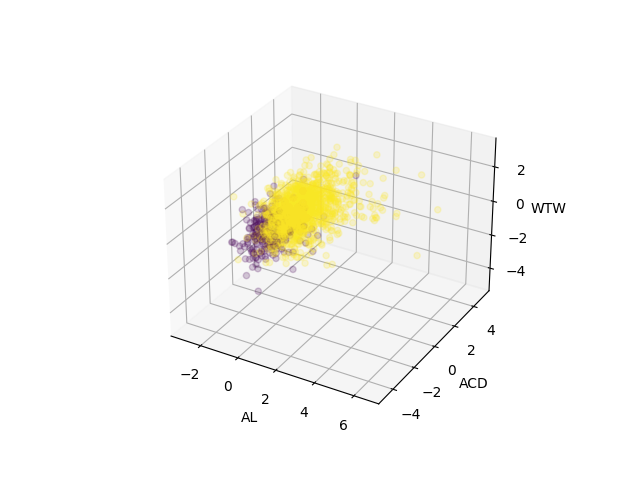

In [149]:
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

f1 = feature_cols[0]
f2 = feature_cols[1]
f3 = feature_cols[2]

#ax.scatter(X_norm[f1], X_norm[f2], X_norm[f3], marker='o', c=y, alpha=0.2, cmap='viridis')
ax.scatter(X_norm[f1], X_norm[f2], X_norm[f3], marker='o', c=identified_clusters, alpha=0.2, cmap='viridis')

ax.set_xlabel(f1)
ax.set_ylabel(f2)
ax.set_zlabel(f3)

In [126]:
from sklearn.cluster import KMeans

kmeans = KMeans(2)
kmeans.fit(X_norm)

identified_clusters = kmeans.labels_
np.unique(identified_clusters)

array([0, 1], dtype=int32)

In [145]:
from sklearn.cluster import MiniBatchKMeans

model = MiniBatchKMeans(2)
model.fit(X_norm)

identified_clusters = model.labels_
np.unique(identified_clusters)

array([0, 1], dtype=int32)

In [146]:
X_new = X.copy()
X_new['Prediction'] = identified_clusters

X_new

,AL,ACD,WTW,K1,K2,Prediction
0,23.79,3.32,12.0,43.60,44.29,1
1,24.60,3.39,12.3,42.03,43.95,1
2,24.59,3.51,12.3,42.83,43.05,1
3,24.04,2.96,12.0,42.35,42.83,1
4,24.80,2.44,12.2,41.01,41.67,1
...,...,...,...,...,...,...
1523,23.32,3.29,12.5,43.16,43.95,1
1524,23.59,3.19,13.0,42.72,43.60,1
1525,26.18,3.83,12.1,43.44,44.18,1
1526,24.09,2.77,12.6,42.83,43.72,1


In [147]:
group_1 = X_new[ X_new['Prediction'] == 0 ]
group_2 = X_new[ X_new['Prediction'] == 1 ]
#group_3 = X_new[ X_new['Prediction'] == 2 ]

groups = [group_1, group_2] #, group_3]

group_1.describe()

,AL,ACD,WTW,K1,K2,Prediction
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.0
mean,22.321690,2.896373,11.548592,45.636268,46.673099,0.0
std,0.658319,0.392028,0.338723,1.050026,1.138752,0.0
min,20.240000,2.030000,9.900000,42.780000,44.350000,0.0
25%,21.930000,2.620000,11.300000,44.940000,45.905000,0.0
50%,22.315000,2.875000,11.600000,45.550000,46.550000,0.0
75%,22.692500,3.112500,11.800000,46.230000,47.270000,0.0
max,24.550000,4.770000,12.500000,49.410000,52.410000,0.0


In [148]:
group_2.describe()

,AL,ACD,WTW,K1,K2,Prediction
count,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.0
mean,23.752452,3.154751,12.072468,42.974453,43.844686,1.0
std,1.059938,0.422560,0.389597,1.474427,1.433757,0.0
min,20.150000,1.130000,10.900000,30.930000,33.950000,1.0
25%,23.030000,2.870000,11.800000,42.190000,43.050000,1.0
50%,23.595000,3.130000,12.100000,43.100000,43.950000,1.0
75%,24.250000,3.390000,12.300000,43.890000,44.820000,1.0
max,30.960000,5.230000,13.300000,46.940000,48.700000,1.0
